In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset

dataset = pd.read_csv('E:/datafiles/Churn_Modelling.csv')

X = dataset.iloc[:, 3:13]  #independent column
y = dataset.iloc[:, 13]    #dependent column

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


In [5]:
print(y.head())

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [6]:
#Create dummy variables

#In our dataset the 'Geography', 'Gender' are categorical features so convert them into dummy variable/features
#To transform categorical data into nomial data like 0,1,2 because machine can only understands numerical data.

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [7]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [8]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [9]:
# Concatenate the Data Frames with X data set

X=pd.concat([X,geography,gender],axis=1)


In [10]:
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0          1               1        101348.88        0      0     0  
1          0               1        112542.58        0      1     0  
2          1               0        113931.57        0      0     0  
3          0               0         93826.63        0      0     0  
4          1               1         79084.10        0      1     0  


In [11]:
#Drop Unnecessary columns

X=X.drop(['Geography','Gender'],axis=1)


In [12]:
print(X.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0  


In [13]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [14]:
# Feature Scaling

#Feature Scaling is done on all columns to make same magnitude of all columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages

import keras
from keras.models import Sequential #To perform any operation on ANN in sequentional order then import models(Seque) from keras
from keras.layers import Dense #If we want to create any hidden layer then we have to import Dense layer from keras
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


Using TensorFlow backend.


In [18]:
# Initialising the ANN

classifier = Sequential()

In [19]:
# Adding the input layer and the first hidden layer

#units = 6 :first hidden layer 6 hidden neurons -----> dense_1
#kernel_initializer = 'he_uniform' :is how my of weights initialized
#activation = 'relu' :activation function bcz 'relu' activation function works well with 'he_uniform'
#input_dim = 11 :

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#classifier.add(Dropout(0.2))

In [20]:
# Adding the second hidden layer

#units = 6 :second hidden layer 6 hidden neurons -----> dense_2
#kernel_initializer = 'he_uniform' :is how my of weights initialized
#activation = 'relu' :activation function bcz 'relu' activation function works well with 'he_uniform'

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
#classifier.add(Dropout(0.3))

In [21]:
# Adding the output layer

#This layer has only one dimension and need only one hidden neuron and is used for binary classification
#If binary classification value is greater than 0.5 i.e, (>0.5) the answer is one 1.

#units = 1 :Third hidden layer 1 hidden neurons which is output layer ----> dense_3
#kernel_initializer = 'glorot_uniform' :is how my of weights initialized
#activation = 'sigmoid' :activation function bcz 'sigmoid' activation function works well with 'glorot_uniform'

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
#classifier.add(Dropout(0.4))

In [22]:
#Total params denote that how many number of neurons , weights(w) and bias(b) we are adding

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the ANN

#optimer ='Adamax': is the best optimizer using now in Deep Learning(ANN)
#Whenever your output is 0 or 1 you should use loss = 'binary_crossentropy'
#Whenever your output is multiple categories you should use loss = 'categorical_crossentropy'


classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [24]:
# Fitting the ANN to the Training set

#Taking the validation_split=0.33, so that we can test the dataset seperately, model seperately for test dataset
#Taking batch_size=10 which reduces the computational power and reduce disk i/o operations

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


<ipython-input-24-92053bc2a60d>:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 279us/step - loss: 0.5605 - accuracy: 0.7751 - val_loss: 0.5056 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 242us/step - loss: 0.4973 - accuracy: 0.7962 - val_loss: 0.4787 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 236us/step - loss: 0.4772 - accuracy: 0.7962 - val_loss: 0.4662 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 225us/step - loss: 0.4651 - accuracy: 0.7962 - val_loss: 0.4575 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 233us/step - loss: 0.4557 - accuracy: 0.7962 - val_loss: 0.4502 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 235us/step - loss: 0.4474 - accuracy: 0.7962 - val_loss: 0.4444 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 211us/step

In [25]:
# list all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


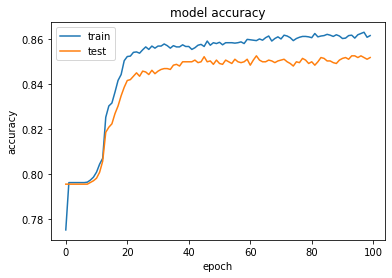

In [26]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

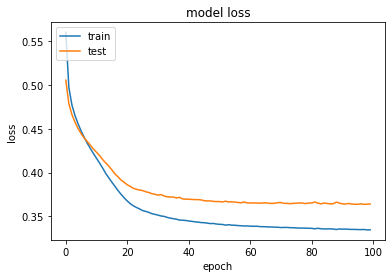

In [27]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [29]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
print(cm)

[[1516   79]
 [ 207  198]]


Text(69.0, 0.5, 'Truth')

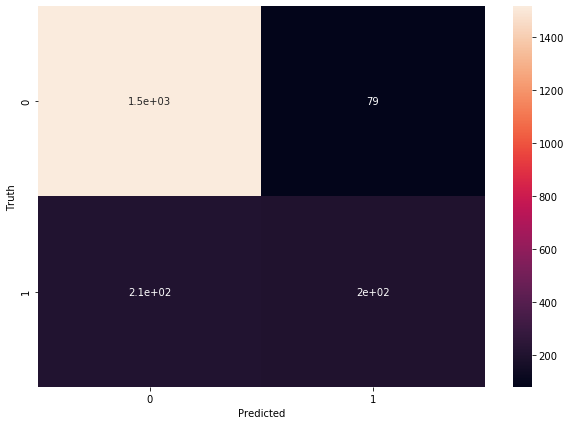

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
# Calculate the Accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [34]:
score

0.857